<a href="https://colab.research.google.com/github/arpitsah/Fast.ai-Lectures/blob/master/Fast_ai_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [17]:
!pip install google_images_download

In [18]:
from google_images_download import google_images_download
classes = ['Teddy','Black','Grizzly']
for i in classes:
  response = google_images_download.googleimagesdownload()
  arguments = {"keywords":i+" Bears","limit":30,"print_urls":False}
  absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = Teddy Bears
Evaluating...
Starting Download...
Completed Image ====> 1. bear_in_robe_1000x1000.jpg
Completed Image ====> 2. 71f-pfbesrl._sx425_.jpg
Completed Image ====> 3. 12704.jpg
Completed Image ====> 4. 510uljn7k8l._sy300_ql70_.jpg
Completed Image ====> 5. bb-1483-2.jpg
Completed Image ====> 6. 222194.jpg&height=475&width=475.jpg
Completed Image ====> 7. 0000321_beige-teddy-bear.png
Completed Image ====> 8. v1.jpg
Completed Image ====> 9. 007739_1.jpg
Completed Image ====> 10. 7617e51c-6004-42c1-ae63-006728db4ced_1.e3d0bbf4faa40c0a21af34e4f1d02546.jpeg
Completed Image ====> 11. ar-01595-2.jpg
Completed Image ====> 12. 24663x.jpg
Completed Image ====> 13. 91dn5ceit3l._sx425_.jpg
Completed Image ====> 14. 93869-90308.jpg
Completed Image ====> 15. big-old-teddy-bear-brown.jpg
Completed Image ====> 16. imageservice?profileid=12026540&imageid=999424-847__1&recipename=350.jpg
Completed Image ====> 17. 61lw73tnchl._sx466_.jpg
Completed Image ====> 18. charlie

In [0]:
path = Path('downloads')

In [20]:
for i in classes:
  verify_images('./downloads/'+i+' Bears', delete='True')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


In [0]:
np.random.seed(42)

data = ImageDataBunch.from_folder('./downloads', train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [22]:
data.classes

['Black Bears', 'Grizzly Bears', 'Teddy Bears']

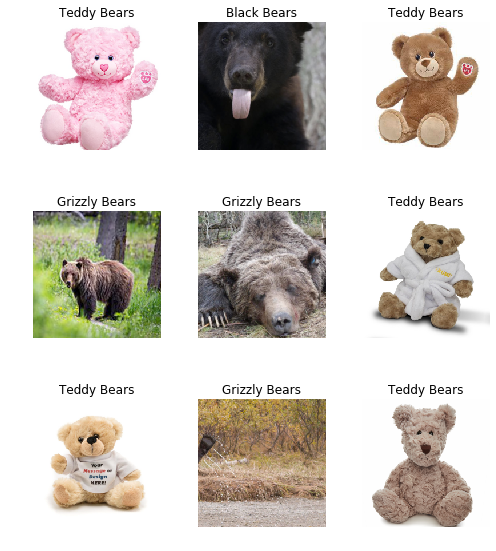

In [23]:
data.show_batch(rows=3, figsize=(7,8))

In [26]:
data.c, len(data.train_ds)

(3, 71)

In [37]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.501349,1.537162,0.529412,00:05
1,1.344432,0.691712,0.411765,00:05
2,0.980961,0.334653,0.117647,00:05
3,0.750622,0.225363,0.058824,00:05


In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


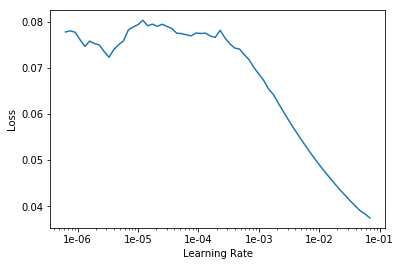

In [40]:
learn.unfreeze()
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(4, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.118433,0.656119,0.235294,00:05
1,0.078644,0.836208,0.176471,00:05
2,0.053909,0.849914,0.058824,00:05
3,0.044677,0.841105,0.058824,00:05


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

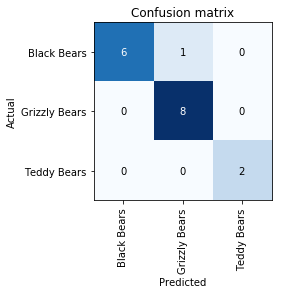

In [44]:
interp.plot_confusion_matrix()

In [0]:
#File Deleter

In [0]:
# from fastai.widgets import *
# losses, idx = interp.top_losses()
# top_loss_paths= data.valid_ds.x[idx]


In [0]:
# fd = FileDeleter(file_paths=top_loss_paths)